# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [3]:
import pandas as pd

file_path = '/home/jovyan/work/Online Retail.xlsx'  # Ensure this matches the actual file name
df = pd.read_excel(file_path)

# Display the first few rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data cleaning 

In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


#### Filling missing values

In [5]:
column_names = df.columns.tolist()
print(column_names)


['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [6]:
df_cleaned = df.copy()

# Handle missing values in 'Description' by filling with the most frequent value (mode)
df_cleaned['Description'] = df_cleaned['Description'].fillna(df_cleaned['Description'].mode()[0])

# Handle missing values in 'CustomerID' by filling with a placeholder
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].fillna(0)

# Check if missing values are resolved
print(df_cleaned.isnull().sum())

# Display the first few rows to verify
print(df_cleaned.head())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


### Explore the basic statistics

In [7]:
# statistical summary of the numerical columns
statistics = df_cleaned.describe()
print(statistics)


            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  541909.000000
mean        9.552250       4.611114   11476.974671
std       218.081158      96.759853    6777.908326
min    -80995.000000  -11062.060000       0.000000
25%         1.000000       1.250000   12352.000000
50%         3.000000       2.080000   14382.000000
75%        10.000000       4.130000   16255.000000
max     80995.000000   38970.000000   18287.000000


### Visualizing the Statistics

##### Perform data visualization to gain insights into the dataset

#### Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales

#### Sales Trends Over Time (Monthly/Yearly)

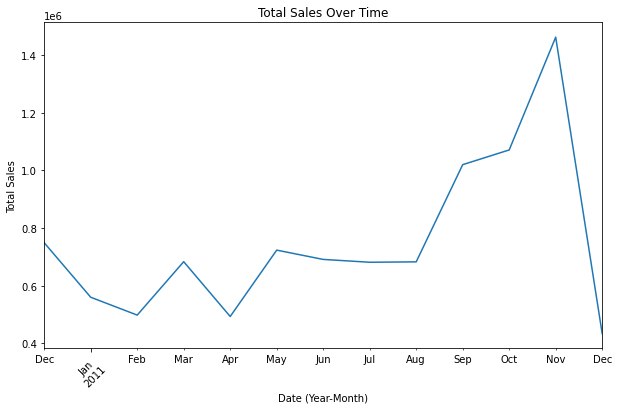

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

# Convert 'InvoiceDate' to datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Extract year and month
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Calculate total sales (Quantity * UnitPrice)
df_cleaned['TotalSales'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Group by 'YearMonth' and sum the 'TotalSales'
sales_trends = df_cleaned.groupby('YearMonth')['TotalSales'].sum()

# Plot sales trends over time
sales_trends.plot(kind='line', figsize=(10, 6))
plt.title('Total Sales Over Time')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

#### Sales Distribution by Country

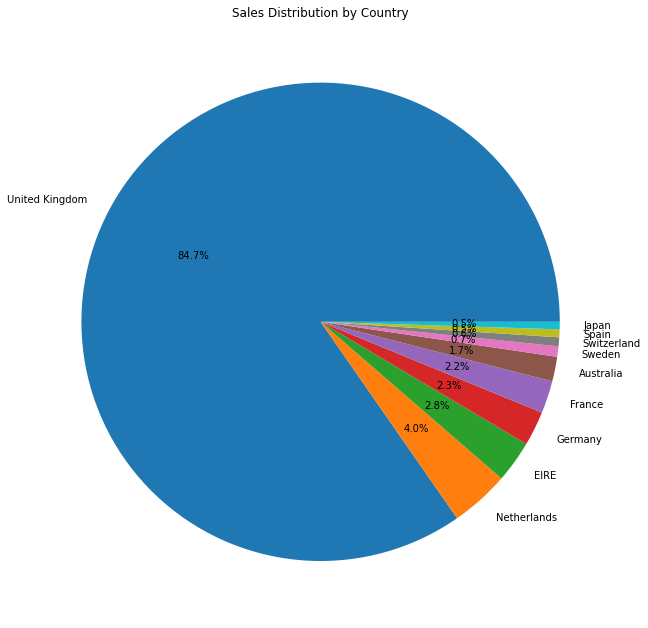

In [11]:
sales_by_country = df_cleaned.groupby('Country')['Quantity'].sum()

# Plot a pie chart for the top 10 countries by sales
sales_by_country.sort_values(ascending=False).head(10).plot(kind='pie', figsize=(11, 11), autopct='%1.1f%%')
plt.title('Sales Distribution by Country')
plt.ylabel('')
plt.show()

#### Top-Selling Products:

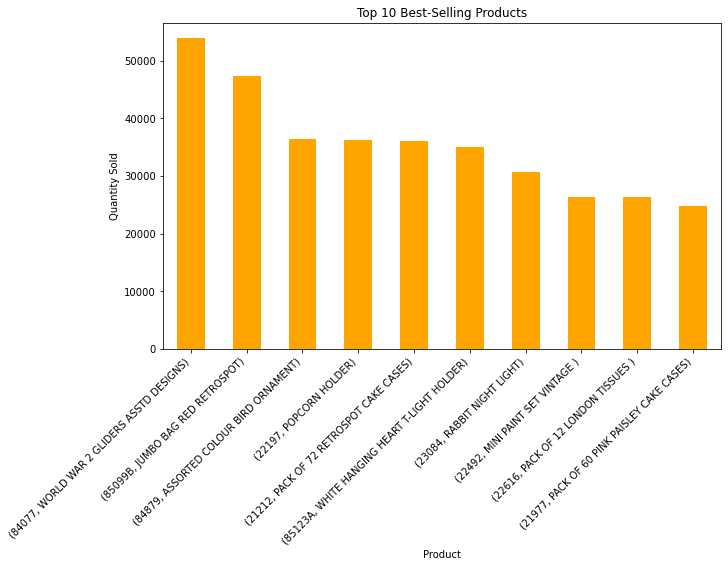

In [18]:
# Group by 'StockCode' and 'Description', and sum the 'Quantity'
top_selling_products = df_cleaned.groupby(['StockCode', 'Description'])['Quantity'].sum().nlargest(10)

# Plot top-selling products (Bar chart)
top_selling_products.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Top-Selling Countries

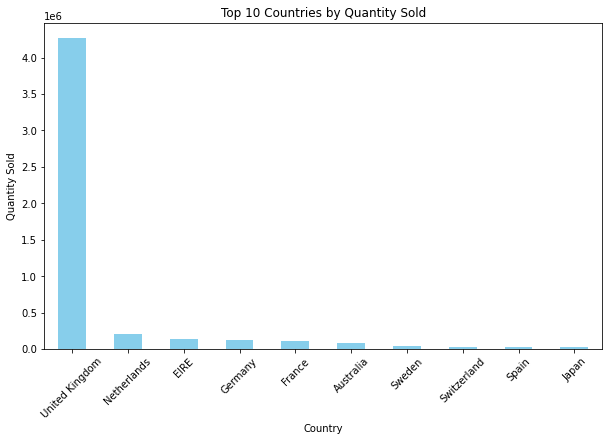

In [19]:
# Group by 'Country' and sum the 'Quantity'
sales_by_country = df_cleaned.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Plot top-selling countries (Bar chart)
sales_by_country.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Countries by Quantity Sold')
plt.xlabel('Country')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

#### Busiet busiest month of the year

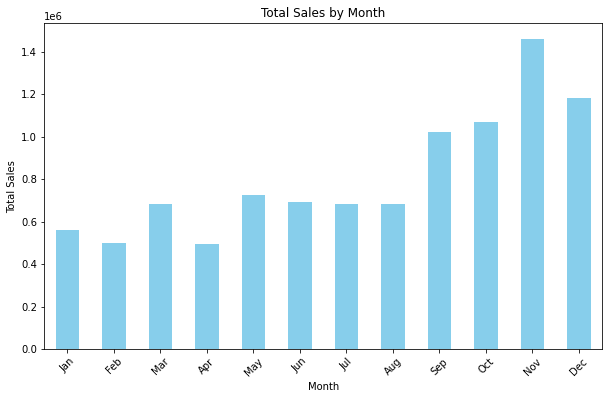

In [22]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], errors='coerce')

# Extract Month and Day of the Week
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['DayOfWeek'] = df_cleaned['InvoiceDate'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Create a new column for TotalSales (Quantity * UnitPrice)
df_cleaned['TotalSales'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Busiest months (total sales per month)
monthly_sales = df_cleaned.groupby('Month')['TotalSales'].sum()

# Busiest days of the week (total sales per day of the week)
daily_sales = df_cleaned.groupby('DayOfWeek')['TotalSales'].sum()

# Plot Busiest Months
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

#### Busiest day of the week

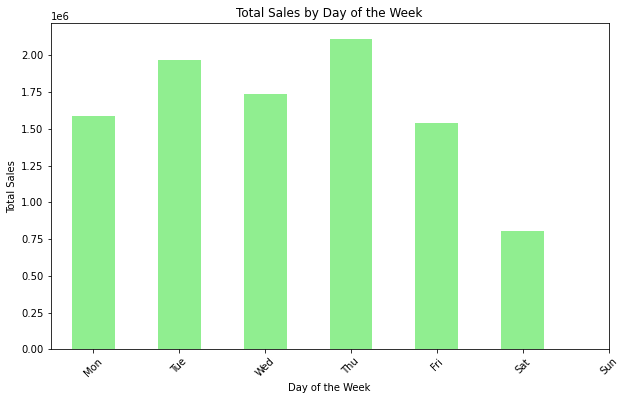

In [23]:
# Plot Busiest Days of the Week
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

### Identify Outliers using Box Plots:

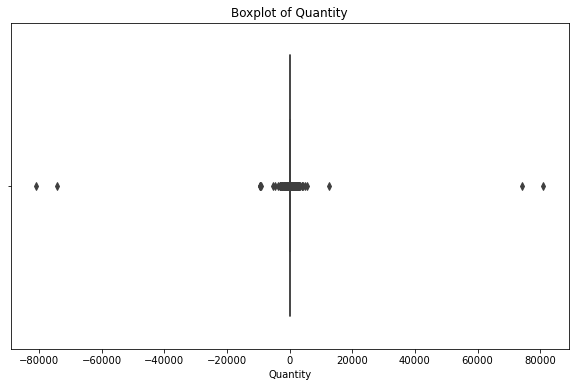

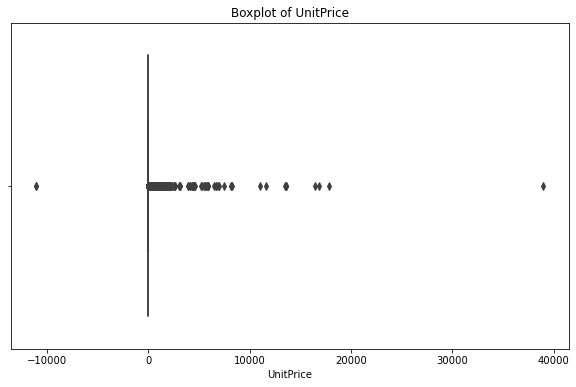

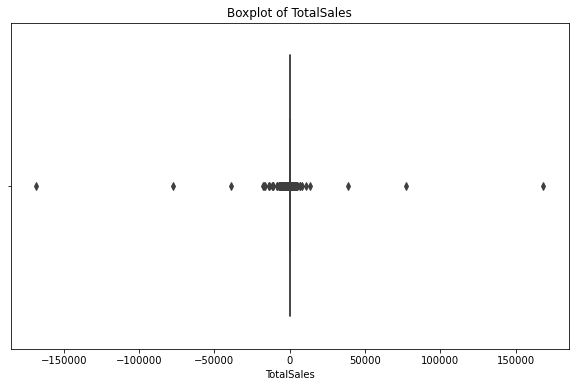

In [21]:
import seaborn as sns

# Boxplot for Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

# Boxplot for UnitPrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['UnitPrice'])
plt.title('Boxplot of UnitPrice')
plt.show()

# Boxplot for TotalSales
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['TotalSales'])
plt.title('Boxplot of TotalSales')
plt.show()


## Summary and Conclusion

### Key insights

1. Weekday Sales Dominance

Weekday sales are higher than weekend sales. This suggests that customers are more engaged during weekdays, possibly due to work-related purchases or regular browsing habits

2. Peak Sales Months

Sales are highest in September, October, November, and December, likely due to holiday seasons and year-end shopping trends.

3. Geographic Contribution

The United Kingdom accounts for 84.7% of total sales, making it the store's primary market.
Other notable contributors include the Netherlands (4%), EIRE, Germany, and France. The most sold item has more than 50,000 sells recorded, while the 8th, 9th and 10th best selling items have around 25,000 sells each.

4. Top-Selling Products

Specific products (e.g., World war 2 Gliders ASSTD designs, Jumbo bag red retrospot etc) show consistent popularity, contributing significantly to sales revenue.

### Notes

Weekday Sales Trends: This trend could be influenced by office supplies or work-related purchases, as well as regular promotions targeted toward weekday customers.

Seasonality: The high sales in Q4 (Sep-Dec) align with back-to-school, Black Friday, and holiday shopping patterns.

Geographic Sales: The reliance on the UK market highlights both an opportunity and a potential risk if demand decreases. Diversifying focus to other countries like the Netherlands and Germany could mitigate risks.

### Conclusion

The dataset reveals several critical insights:

a. Weekdays outperform weekends in sales, indicating active customer engagement during workdays.

b. September through December drive the highest revenue, reflecting seasonal shopping behavior.

c. The United Kingdom dominates sales, with other European countries making smaller contributions.

d. Popular products significantly influence overall sales performance and could be leveraged further to increase revenue.
